# 1 Imports

In [350]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz

from codigo import knn, knn_modificado
from codigo.metrics import accuracy

from scipy.spatial import distance

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import RocCurveDisplay

from sklearn.preprocessing import label_binarize

 # 
 # 
 # 

# 2 Datasets

In [351]:
#definição dos datasets
ds1 = pd.read_csv('./datasets/task_16_with_dataset_16.csv')
ds2 = pd.read_csv('./datasets/task_53_with_dataset_54.csv')
ds3 = pd.read_csv('./datasets/task_3917_with_dataset_1067.csv')
ds4 = pd.read_csv('./datasets/task_10101_with_dataset_1464.csv')
ds5 = pd.read_csv('./datasets/task_146817_with_dataset_40982.csv')

### 

In [352]:
ds1

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att56,att57,att58,att59,att60,att61,att62,att63,att64,class
0,-10.297008,-11.666789,11.560669,-2.081316,4.044656,4.086815,-2.558072,-8.476935,2.138135,3.503082,...,0.921927,0.496387,-0.643667,0.284104,0.286555,0.348625,1.814691,-1.351353,-0.473910,1
1,-5.036009,-12.885333,0.161155,0.592460,3.123534,4.220469,-6.411771,-6.335328,-0.244622,1.346073,...,2.938791,1.429883,-2.336344,1.281628,-0.098321,0.582357,0.485792,0.642451,0.613107,1
2,-9.639157,-6.655898,0.388687,-1.717650,0.300346,3.400769,-7.240785,-1.659405,-0.874005,4.153403,...,-0.023028,-0.025265,1.259838,-0.441360,-0.960094,1.995843,1.097748,0.827182,-1.767840,1
3,-6.650375,-7.043851,4.104350,-2.342780,3.494658,3.924822,-9.874812,-6.556576,-1.364269,1.153308,...,-1.043815,-0.204508,-1.981150,0.982438,-0.144233,-1.449328,-0.913552,-0.771735,0.304992,1
4,-10.664524,-10.974133,0.194391,0.453885,2.193088,-3.304663,-8.376592,-4.241146,2.964818,-0.949622,...,1.448160,-1.254907,-3.481295,-0.563889,1.529335,0.510399,0.298318,-0.943213,1.149847,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-2.415248,-6.619806,5.053538,6.662300,12.136673,-1.447842,-2.321873,4.042169,-2.981806,-0.106785,...,-0.714285,0.017051,0.460572,-0.951763,0.241901,-0.399051,-0.304857,-0.068411,-1.049052,10
1996,5.892684,-8.185875,1.819305,6.871263,1.021332,-0.869375,-6.759738,-3.891993,-4.781352,3.355656,...,1.273016,0.227573,0.444086,1.439473,-0.405706,0.378187,-0.128056,0.925637,1.798053,10
1997,1.881613,-9.650881,0.317780,0.655888,7.882648,1.740497,0.026943,-4.412813,-3.403179,-0.614610,...,-1.622687,0.309964,0.473773,0.916683,0.971719,0.689472,-0.439637,0.287013,-0.420793,10
1998,-1.530886,-10.183775,-1.055864,4.956079,11.729954,1.480784,-2.806543,0.602515,-5.411981,-2.165543,...,-0.466334,0.128358,-0.888494,-0.014442,-0.780897,1.000286,1.405214,0.435514,-0.225426,10


Prever "class", cujos valores possíveis são: '1, 2, 3, 4, 5, 6, 7, 8, 9, 10'. 

Os atributos representam 64 descritores do Karhunen-Loeve Transform, uma transformação linear que corresponde à projeção das imagens dos vetores próprios de uma matriz covariante.

### 

In [353]:
ds2

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178.0,72,10,162.0,42,20,159,176.0,379.0,184.0,70,6,16,187,197,van
1,91,41,84,141.0,57,9,149.0,45,19,143,170.0,330.0,158.0,72,9,14,189,199,van
2,104,50,106,209.0,66,10,207.0,32,23,158,223.0,635.0,220.0,73,14,9,188,196,saab
3,93,41,82,159.0,63,9,144.0,46,19,143,160.0,309.0,127.0,63,6,10,199,207,van
4,85,44,70,205.0,103,52,149.0,45,19,144,241.0,325.0,188.0,127,9,11,180,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39,87,183.0,64,8,169.0,40,20,134,200.0,422.0,149.0,72,7,25,188,195,saab
842,89,46,84,163.0,66,11,159.0,43,20,159,173.0,368.0,176.0,72,1,20,186,197,van
843,106,54,101,222.0,67,12,222.0,30,25,173,228.0,721.0,200.0,70,3,4,187,201,saab
844,86,36,78,146.0,58,7,135.0,50,18,124,155.0,270.0,148.0,66,0,25,190,195,saab


Prever "Class", cujos valores possíveis são: 'opel, saab, bus, van'.

Os atributos foram extraídos das silhuetas ATRAVÉS extensão BINATTS do HIPS (Hierarchical Image Processing System), e referem-se a características de veículos.

### 

In [354]:
ds3

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2.0,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1.0,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,83.0,11.0,1.0,11.0,171.0,927.89,0.04,23.04,40.27,21378.61,...,65.0,10,6,0,18.0,25.0,107.0,64.0,21.0,True
3,46.0,8.0,6.0,8.0,141.0,769.78,0.07,14.86,51.81,11436.73,...,37.0,2,5,0,16.0,28.0,89.0,52.0,15.0,True
4,25.0,3.0,1.0,3.0,58.0,254.75,0.11,9.35,27.25,2381.95,...,21.0,0,2,0,11.0,10.0,41.0,17.0,5.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2104,19.0,2.0,1.0,2.0,40.0,175.69,0.15,6.82,25.77,1197.90,...,12.0,1,2,0,10.0,11.0,25.0,15.0,3.0,False
2105,23.0,3.0,3.0,3.0,60.0,278.63,0.10,9.69,28.75,2700.58,...,18.0,1,2,0,12.0,13.0,39.0,21.0,5.0,False
2106,2.0,1.0,1.0,1.0,4.0,8.00,0.67,1.50,5.33,12.00,...,0.0,0,0,0,3.0,1.0,3.0,1.0,1.0,False
2107,13.0,1.0,1.0,1.0,17.0,60.94,0.25,4.00,15.24,243.78,...,6.0,0,5,0,6.0,6.0,9.0,8.0,1.0,False


Prever "defects", cujos valores possíveis são: 'false, true'.

Um dos datasets do NASA Metrics Data Program. Dados de software para gestão de armazenamento para recessão e processamento de dados terrestres.

### 

In [355]:
ds4

,V1,V2,V3,V4,Class
0,2,50,12500.0,98,2
1,0,13,3250.0,28,2
2,1,16,4000.0,35,2
3,2,20,5000.0,45,2
4,1,24,6000.0,77,1
...,...,...,...,...,...
743,23,2,500.0,38,1
744,21,2,500.0,52,1
745,23,3,750.0,62,1
746,39,1,250.0,39,1


Prever "Class", cujos valores possíveis são: '1, 2'.

Dados retirados do Blood Transfusion Service Center em Hsin-Chu City (Taiwan). Os atributos relacionam-se com tempo desde a última doação de sangue, frequência de doação, ... O objetivo é saber se a pessoa doou, ou não, sangue em Março de 2007 (2=sim, 1=não).

### 

In [356]:
ds5

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,target
0,42.0,50.0,270900.0,270944.0,267.0,17.0,44.0,24220.0,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry
1,645.0,651.0,2538079.0,2538108.0,108.0,10.0,30.0,11397.0,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry
2,829.0,835.0,1553913.0,1553931.0,71.0,8.0,19.0,7972.0,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry
3,853.0,860.0,369370.0,369415.0,176.0,13.0,45.0,18996.0,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry
4,1289.0,1306.0,498078.0,498335.0,2409.0,60.0,260.0,246930.0,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249.0,277.0,325780.0,325796.0,273.0,54.0,22.0,35033.0,119,141,...,0.5185,0.7273,0.0,2.4362,1.4472,1.2041,-0.4286,0.0026,0.7254,Other_Faults
1937,144.0,175.0,340581.0,340598.0,287.0,44.0,24.0,34599.0,112,133,...,0.7046,0.7083,0.0,2.4579,1.4914,1.2305,-0.4516,-0.0582,0.8173,Other_Faults
1938,145.0,174.0,386779.0,386794.0,292.0,40.0,22.0,37572.0,120,140,...,0.7250,0.6818,0.0,2.4654,1.4624,1.1761,-0.4828,0.0052,0.7079,Other_Faults
1939,137.0,170.0,422497.0,422528.0,419.0,97.0,47.0,52715.0,117,140,...,0.3402,0.6596,0.0,2.6222,1.5185,1.4914,-0.0606,-0.0171,0.9919,Other_Faults


Prever 'target', cujos valores possíveis são: 'Bumps, Dirtiness, K_Scratch, Other_Faults, Pastry, Stains, Z_Scratch'.

Dataset relativo a problemas de placas de aço, sendo os atributos a descricao do local, tamanho, cor, e outras características do problema.

# 
# 
# 

# 3 Recolha de Dados

## 3.1 Preparação

In [357]:
#separacao dos dados de cada dataset em features e target
X1 = ds1.iloc[:, :-1]
y1 = ds1.iloc[:, -1]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.1, random_state=1111)

X2 = ds2.iloc[:, :-1]
y2 = ds2.iloc[:, -1]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.1, random_state=1111)

X3 = ds3.iloc[:, :-1]
y3 = ds3.iloc[:, -1]
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.1, random_state=1111)

X4 = ds4.iloc[:, :-1]
y4 = ds4.iloc[:, -1]
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.1, random_state=1111)

X5 = ds5.iloc[:, :-1]
y5 = ds5.iloc[:, -1]
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.1, random_state=1111)

In [358]:
#definição dos modelos (clf1 é o knn original, clf2 é a nossa versão)
clf1 = knn.KNNClassifier(k=5, distance_func=distance.euclidean)
clf2 = knn_modificado.KNNClassifier(k=5, distance_func=distance.euclidean, outlier_threshold=8)

In [359]:
#definição de KFold para 10-fold crossvalidation
kf = KFold(n_splits=10, shuffle=True)

# 

## 3.2 ds1

In [360]:
#criação de arrays para guardar os valores das performance metrics de cada fold

#accuracy
accuracies_ds1_clf1 = []
accuracies_ds1_clf2 = []

#precision
precisions_ds1_clf1 = []
precisions_ds1_clf2 = []

#recall
recalls_ds1_clf1 = []
recalls_ds1_clf2 = []

#f1 score
f1_scores_ds1_clf1 = []
f1_scores_ds1_clf2 = []

#confusion matrix
confusion_matrices_ds1_clf1 = []
confusion_matrices_ds1_clf2 = []
labels_y1 = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']



#nao foi implementada a funcao que permite fazer fazer o ROC AUC
#por isso nao vai ser incluido!
#roc_aucs_ds1_clf1 = []
#roc_aucs_ds1_clf2 = []
#y1_binarized = label_binarize(y1, classes=np.unique(y1))
#roc_aucs_ds1_clf1 = []
#roc_aucs_ds1_clf2 = []

In [361]:
#10-fold crossvalidation, guardando os valores das performance metrics em cada fold
for train_index, test_index in kf.split(X1):
    
    #separação dos dados em train e test
    X1_train, X1_test = X1.iloc[train_index], X1.iloc[test_index]
    y1_train, y1_test = y1.iloc[train_index], y1.iloc[test_index]
    
    #fit do modelo
    clf1.fit(X1_train, y1_train)
    clf2.fit(X1_train,y1_train)
    
    #previsoes
    y1_pred_clf1 = clf1.predict(X1_test)
    y1_pred_clf2 = clf2.predict(X1_test)
    
    #accuracy
    accuracies_ds1_clf1.append(accuracy_score(y1_test, y1_pred_clf1))
    accuracies_ds1_clf2.append(accuracy_score(y1_test, y1_pred_clf2))
    
    #precision
    precisions_ds1_clf1.append(precision_score(y1_test, y1_pred_clf1, average='weighted'))
    precisions_ds1_clf2.append(precision_score(y1_test, y1_pred_clf2, average='weighted'))
    
    #recall
    recalls_ds1_clf1.append(recall_score(y1_test, y1_pred_clf1, average='weighted'))
    recalls_ds1_clf2.append(recall_score(y1_test, y1_pred_clf2, average='weighted'))
        
    #f1 score
    f1_scores_ds1_clf1.append(f1_score(y1_test, y1_pred_clf1, average='weighted'))
    f1_scores_ds1_clf2.append(f1_score(y1_test, y1_pred_clf2, average='weighted'))
    
    #confusion matrix
    confusion_matrices_ds1_clf1.append(confusion_matrix(y1_test, y1_pred_clf1))
    confusion_matrices_ds1_clf2.append(confusion_matrix(y1_test, y1_pred_clf2))

In [362]:
#cálculo das médias das performance metrics de cada fold do clf1

#accuracy
mean_accuracy_ds1_clf1 = np.mean(accuracies_ds1_clf1)
std_accuracy_ds1_clf1 = np.std(accuracies_ds1_clf1)

#precision
mean_precision_ds1_clf1 = np.mean(precisions_ds1_clf1)
std_precision_ds1_clf1 = np.std(precisions_ds1_clf1)

#recall
mean_recall_ds1_clf1 = np.mean(recalls_ds1_clf1)
std_recall_ds1_clf1 = np.std(recalls_ds1_clf1)

#f1 score
mean_f1_ds1_clf1 = np.mean(f1_scores_ds1_clf1)
std_f1_ds1_clf1 = np.std(f1_scores_ds1_clf1)

#confusion matrix
sum_cm_ds1_clf1 = np.sum(confusion_matrices_ds1_clf1, axis=0)
disp_cm_ds1_clf1 = ConfusionMatrixDisplay(confusion_matrix=sum_cm_ds1_clf1, display_labels=labels)

In [363]:
#cálculo das médias das performance metrics de cada fold do clf2

#accuracy
mean_accuracy_ds1_clf2 = np.mean(accuracies_ds1_clf2)
std_accuracy_ds1_clf2 = np.std(accuracies_ds1_clf2)

#precision
mean_precision_ds1_clf2 = np.mean(precisions_ds1_clf2)
std_precision_ds1_clf2 = np.std(precisions_ds1_clf2)

#recall
mean_recall_ds1_clf2 = np.mean(recalls_ds1_clf2)
std_recall_ds1_clf2 = np.std(recalls_ds1_clf2)

#f1 score
mean_f1_ds1_clf2 = np.mean(f1_scores_ds1_clf2)
std_f1_ds1_clf2 = np.std(f1_scores_ds1_clf2)

#confusion matrix
sum_cm_ds1_clf2 = np.sum(confusion_matrices_ds1_clf2, axis=0)
disp_cm_ds1_clf2 = ConfusionMatrixDisplay(confusion_matrix=sum_cm_ds1_clf2, display_labels=labels_y1)

In [364]:
#tabela de comparação

comparacao_ds1 = {
    'Modelo Original': {'Accuracy': mean_accuracy_ds1_clf1, 'Precision': mean_precision_ds1_clf1, 'Recall': mean_recall_ds1_clf1, 'F1 Score': mean_f1_ds1_clf1},
    'Modelo Modificado': {'Accuracy': mean_accuracy_ds1_clf2, 'Precision': mean_precision_ds1_clf2, 'Recall': mean_recall_ds1_clf2, 'F1 Score': mean_f1_ds1_clf2},
}

resultados_ds1 = pd.DataFrame(comparacao_ds1).T

# 

## 3.3 ds2

In [365]:
#criação de arrays para guardar os valores das performance metrics de cada fold

#accuracy
accuracies_ds2_clf1 = []
accuracies_ds2_clf2 = []

#precision
precisions_ds2_clf1 = []
precisions_ds2_clf2 = []

#recall
recalls_ds2_clf1 = []
recalls_ds2_clf2 = []

#f1 score
f1_scores_ds2_clf1 = []
f1_scores_ds2_clf2 = []

#confusion matrix
confusion_matrices_ds2_clf1 = []
confusion_matrices_ds2_clf2 = []
labels_y2 = ['opel', 'saab', 'bus', 'van']



#nao foi implementada a funcao que permite fazer fazer o ROC AUC
#por isso nao vai ser incluido!
#roc_aucs_ds2_clf1 = []
#roc_aucs_ds2_clf2 = []
#y2_binarized = label_binarize(y2, classes=np.unique(y2))
#roc_aucs_ds2_clf1 = []
#roc_aucs_ds2_clf2 = []

In [366]:
#10-fold crossvalidation, guardando os valores das performance metrics em cada fold
for train_index, test_index in kf.split(X2):
    
    #separação dos dados em train e test
    X2_train, X2_test = X2.iloc[train_index], X2.iloc[test_index]
    y2_train, y2_test = y2.iloc[train_index], y2.iloc[test_index]
    
    #fit do modelo
    clf1.fit(X2_train, y2_train)
    clf2.fit(X2_train,y2_train)
    
    #previsoes
    y2_pred_clf1 = clf1.predict(X2_test)
    y2_pred_clf2 = clf2.predict(X2_test)
    
    #accuracy
    accuracies_ds2_clf1.append(accuracy_score(y2_test, y2_pred_clf1))
    accuracies_ds2_clf2.append(accuracy_score(y2_test, y2_pred_clf2))
    
    #precision
    precisions_ds2_clf1.append(precision_score(y2_test, y2_pred_clf1, average='weighted'))
    precisions_ds2_clf2.append(precision_score(y2_test, y2_pred_clf2, average='weighted'))
    
    #recall
    recalls_ds2_clf1.append(recall_score(y2_test, y2_pred_clf1, average='weighted'))
    recalls_ds2_clf2.append(recall_score(y2_test, y2_pred_clf2, average='weighted'))
        
    #f1 score
    f1_scores_ds2_clf1.append(f1_score(y2_test, y2_pred_clf1, average='weighted'))
    f1_scores_ds2_clf2.append(f1_score(y2_test, y2_pred_clf2, average='weighted'))
    
    #confusion matrix
    confusion_matrices_ds2_clf1.append(confusion_matrix(y2_test, y2_pred_clf1))
    confusion_matrices_ds2_clf2.append(confusion_matrix(y2_test, y2_pred_clf2))

In [367]:
#cálculo das médias das performance metrics de cada fold do clf1

#accuracy
mean_accuracy_ds2_clf1 = np.mean(accuracies_ds2_clf1)
std_accuracy_ds2_clf1 = np.std(accuracies_ds2_clf1)

#precision
mean_precision_ds2_clf1 = np.mean(precisions_ds2_clf1)
std_precision_ds2_clf1 = np.std(precisions_ds2_clf1)

#recall
mean_recall_ds2_clf1 = np.mean(recalls_ds2_clf1)
std_recall_ds2_clf1 = np.std(recalls_ds2_clf1)

#f1 score
mean_f1_ds2_clf1 = np.mean(f1_scores_ds2_clf1)
std_f1_ds2_clf1 = np.std(f1_scores_ds2_clf1)

#confusion matrix
sum_cm_ds2_clf1 = np.sum(confusion_matrices_ds2_clf1, axis=0)
disp_cm_ds2_clf1 = ConfusionMatrixDisplay(confusion_matrix=sum_cm_ds2_clf1, display_labels=labels_y2)

In [368]:
#cálculo das médias das performance metrics de cada fold do clf2

#accuracy
mean_accuracy_ds2_clf2 = np.mean(accuracies_ds2_clf2)
std_accuracy_ds2_clf2 = np.std(accuracies_ds2_clf2)

#precision
mean_precision_ds2_clf2 = np.mean(precisions_ds2_clf2)
std_precision_ds2_clf2 = np.std(precisions_ds2_clf2)

#recall
mean_recall_ds2_clf2 = np.mean(recalls_ds2_clf2)
std_recall_ds2_clf2 = np.std(recalls_ds2_clf2)

#f1 score
mean_f1_ds2_clf2 = np.mean(f1_scores_ds2_clf2)
std_f1_ds2_clf2 = np.std(f1_scores_ds2_clf2)

#confusion matrix
sum_cm_ds2_clf2 = np.sum(confusion_matrices_ds2_clf2, axis=0)
disp_cm_ds2_clf2 = ConfusionMatrixDisplay(confusion_matrix=sum_cm_ds2_clf2, display_labels=labels_y2)

In [369]:
#tabela de comparação

comparacao_ds2 = {
    'Modelo Original': {'Accuracy': mean_accuracy_ds2_clf1, 'Precision': mean_precision_ds2_clf1, 'Recall': mean_recall_ds2_clf1, 'F1 Score': mean_f1_ds2_clf1},
    'Modelo Modificado': {'Accuracy': mean_accuracy_ds2_clf2, 'Precision': mean_precision_ds2_clf2, 'Recall': mean_recall_ds2_clf2, 'F1 Score': mean_f1_ds2_clf2},
}

resultados_ds2 = pd.DataFrame(comparacao_ds2).T

# 

## 3.4 ds3

In [370]:
#criação de arrays para guardar os valores das performance metrics de cada fold

#accuracy
accuracies_ds3_clf1 = []
accuracies_ds3_clf2 = []

#precision
precisions_ds3_clf1 = []
precisions_ds3_clf2 = []

#recall
recalls_ds3_clf1 = []
recalls_ds3_clf2 = []

#f1 score
f1_scores_ds3_clf1 = []
f1_scores_ds3_clf2 = []

#confusion matrix
confusion_matrices_ds3_clf1 = []
confusion_matrices_ds3_clf2 = []
labels_y3 = ['false', 'true']


#PODE-SE FAZER ROC AUC!!!!
#roc_aucs_ds3_clf1 = []
#roc_aucs_ds3_clf2 = []
#y3_binarized = label_binarize(y2, classes=np.unique(y2))
#roc_aucs_ds3_clf1 = []
#roc_aucs_ds3_clf2 = []

In [371]:
#10-fold crossvalidation, guardando os valores das performance metrics em cada fold
for train_index, test_index in kf.split(X3):
    
    #separação dos dados em train e test
    X3_train, X3_test = X3.iloc[train_index], X3.iloc[test_index]
    y3_train, y3_test = y3.iloc[train_index], y3.iloc[test_index]
    
    #fit do modelo
    clf1.fit(X3_train, y3_train)
    clf2.fit(X3_train,y3_train)
    
    #previsoes
    y3_pred_clf1 = clf1.predict(X3_test)
    y3_pred_clf2 = clf2.predict(X3_test)
    
    #accuracy
    accuracies_ds3_clf1.append(accuracy_score(y3_test, y3_pred_clf1))
    accuracies_ds3_clf2.append(accuracy_score(y3_test, y3_pred_clf2))
    
    #precision
    precisions_ds3_clf1.append(precision_score(y3_test, y3_pred_clf1, average='weighted'))
    precisions_ds3_clf2.append(precision_score(y3_test, y3_pred_clf2, average='weighted'))
    
    #recall
    recalls_ds3_clf1.append(recall_score(y3_test, y3_pred_clf1, average='weighted'))
    recalls_ds3_clf2.append(recall_score(y3_test, y3_pred_clf2, average='weighted'))
        
    #f1 score
    f1_scores_ds3_clf1.append(f1_score(y3_test, y3_pred_clf1, average='weighted'))
    f1_scores_ds3_clf2.append(f1_score(y3_test, y3_pred_clf2, average='weighted'))
    
    #confusion matrix
    confusion_matrices_ds3_clf1.append(confusion_matrix(y3_test, y3_pred_clf1))
    confusion_matrices_ds3_clf2.append(confusion_matrix(y3_test, y3_pred_clf2))

In [372]:
#cálculo das médias das performance metrics de cada fold do clf1

#accuracy
mean_accuracy_ds3_clf1 = np.mean(accuracies_ds3_clf1)
std_accuracy_ds3_clf1 = np.std(accuracies_ds3_clf1)

#precision
mean_precision_ds3_clf1 = np.mean(precisions_ds3_clf1)
std_precision_ds3_clf1 = np.std(precisions_ds3_clf1)

#recall
mean_recall_ds3_clf1 = np.mean(recalls_ds3_clf1)
std_recall_ds3_clf1 = np.std(recalls_ds3_clf1)

#f1 score
mean_f1_ds3_clf1 = np.mean(f1_scores_ds3_clf1)
std_f1_ds3_clf1 = np.std(f1_scores_ds3_clf1)

#confusion matrix
sum_cm_ds3_clf1 = np.sum(confusion_matrices_ds3_clf1, axis=0)
disp_cm_ds3_clf1 = ConfusionMatrixDisplay(confusion_matrix=sum_cm_ds3_clf1, display_labels=labels_y3)

In [373]:
#cálculo das médias das performance metrics de cada fold do clf2

#accuracy
mean_accuracy_ds3_clf2 = np.mean(accuracies_ds3_clf2)
std_accuracy_ds3_clf2 = np.std(accuracies_ds3_clf2)

#precision
mean_precision_ds3_clf2 = np.mean(precisions_ds3_clf2)
std_precision_ds3_clf2 = np.std(precisions_ds3_clf2)

#recall
mean_recall_ds3_clf2 = np.mean(recalls_ds3_clf2)
std_recall_ds3_clf2 = np.std(recalls_ds3_clf2)

#f1 score
mean_f1_ds3_clf2 = np.mean(f1_scores_ds3_clf2)
std_f1_ds3_clf2 = np.std(f1_scores_ds3_clf2)

#confusion matrix
sum_cm_ds3_clf2 = np.sum(confusion_matrices_ds3_clf2, axis=0)
disp_cm_ds3_clf2 = ConfusionMatrixDisplay(confusion_matrix=sum_cm_ds3_clf2, display_labels=labels_y3)

In [374]:
#tabela de comparação

comparacao_ds3 = {
    'Modelo Original': {'Accuracy': mean_accuracy_ds3_clf1, 'Precision': mean_precision_ds3_clf1, 'Recall': mean_recall_ds3_clf1, 'F1 Score': mean_f1_ds3_clf1},
    'Modelo Modificado': {'Accuracy': mean_accuracy_ds3_clf2, 'Precision': mean_precision_ds3_clf2, 'Recall': mean_recall_ds3_clf2, 'F1 Score': mean_f1_ds3_clf2},
}

resultados_ds3 = pd.DataFrame(comparacao_ds3).T

# 

## 3.5 ds4

In [375]:
#criação de arrays para guardar os valores das performance metrics de cada fold

#accuracy
accuracies_ds4_clf1 = []
accuracies_ds4_clf2 = []

#precision
precisions_ds4_clf1 = []
precisions_ds4_clf2 = []

#recall
recalls_ds4_clf1 = []
recalls_ds4_clf2 = []

#f1 score
f1_scores_ds4_clf1 = []
f1_scores_ds4_clf2 = []

#confusion matrix
confusion_matrices_ds4_clf1 = []
confusion_matrices_ds4_clf2 = []
labels_y4 = ['1', '2']


#PODE-SE FAZER ROC AUC!!!!
#roc_aucs_ds4_clf1 = []
#roc_aucs_ds4_clf2 = []
#y4_binarized = label_binarize(y2, classes=np.unique(y2))
#roc_aucs_ds4_clf1 = []
#roc_aucs_ds4_clf2 = []

In [376]:
#10-fold crossvalidation, guardando os valores das performance metrics em cada fold
for train_index, test_index in kf.split(X4):
    
    #separação dos dados em train e test
    X4_train, X4_test = X4.iloc[train_index], X4.iloc[test_index]
    y4_train, y4_test = y4.iloc[train_index], y4.iloc[test_index]
    
    #fit do modelo
    clf1.fit(X4_train, y4_train)
    clf2.fit(X4_train,y4_train)
    
    #previsoes
    y4_pred_clf1 = clf1.predict(X4_test)
    y4_pred_clf2 = clf2.predict(X4_test)
    
    #accuracy
    accuracies_ds4_clf1.append(accuracy_score(y4_test, y4_pred_clf1))
    accuracies_ds4_clf2.append(accuracy_score(y4_test, y4_pred_clf2))
    
    #precision
    precisions_ds4_clf1.append(precision_score(y4_test, y4_pred_clf1, average='weighted'))
    precisions_ds4_clf2.append(precision_score(y4_test, y4_pred_clf2, average='weighted'))
    
    #recall
    recalls_ds4_clf1.append(recall_score(y4_test, y4_pred_clf1, average='weighted'))
    recalls_ds4_clf2.append(recall_score(y4_test, y4_pred_clf2, average='weighted'))
        
    #f1 score
    f1_scores_ds4_clf1.append(f1_score(y4_test, y4_pred_clf1, average='weighted'))
    f1_scores_ds4_clf2.append(f1_score(y4_test, y4_pred_clf2, average='weighted'))
    
    #confusion matrix
    confusion_matrices_ds4_clf1.append(confusion_matrix(y4_test, y4_pred_clf1))
    confusion_matrices_ds4_clf2.append(confusion_matrix(y4_test, y4_pred_clf2))

In [377]:
#cálculo das médias das performance metrics de cada fold do clf1

#accuracy
mean_accuracy_ds4_clf1 = np.mean(accuracies_ds4_clf1)
std_accuracy_ds4_clf1 = np.std(accuracies_ds4_clf1)

#precision
mean_precision_ds4_clf1 = np.mean(precisions_ds4_clf1)
std_precision_ds4_clf1 = np.std(precisions_ds4_clf1)

#recall
mean_recall_ds4_clf1 = np.mean(recalls_ds4_clf1)
std_recall_ds4_clf1 = np.std(recalls_ds4_clf1)

#f1 score
mean_f1_ds4_clf1 = np.mean(f1_scores_ds4_clf1)
std_f1_ds4_clf1 = np.std(f1_scores_ds4_clf1)

#confusion matrix
sum_cm_ds4_clf1 = np.sum(confusion_matrices_ds4_clf1, axis=0)
disp_cm_ds4_clf1 = ConfusionMatrixDisplay(confusion_matrix=sum_cm_ds4_clf1, display_labels=labels_y4)

In [378]:
#cálculo das médias das performance metrics de cada fold do clf2

#accuracy
mean_accuracy_ds4_clf2 = np.mean(accuracies_ds4_clf2)
std_accuracy_ds4_clf2 = np.std(accuracies_ds4_clf2)

#precision
mean_precision_ds4_clf2 = np.mean(precisions_ds4_clf2)
std_precision_ds4_clf2 = np.std(precisions_ds4_clf2)

#recall
mean_recall_ds4_clf2 = np.mean(recalls_ds4_clf2)
std_recall_ds4_clf2 = np.std(recalls_ds4_clf2)

#f1 score
mean_f1_ds4_clf2 = np.mean(f1_scores_ds4_clf2)
std_f1_ds4_clf2 = np.std(f1_scores_ds4_clf2)

#confusion matrix
sum_cm_ds4_clf2 = np.sum(confusion_matrices_ds4_clf2, axis=0)
disp_cm_ds4_clf2 = ConfusionMatrixDisplay(confusion_matrix=sum_cm_ds4_clf2, display_labels=labels_y4)

In [379]:
#tabela de comparação

comparacao_ds4 = {
    'Modelo Original': {'Accuracy': mean_accuracy_ds4_clf1, 'Precision': mean_precision_ds4_clf1, 'Recall': mean_recall_ds4_clf1, 'F1 Score': mean_f1_ds4_clf1},
    'Modelo Modificado': {'Accuracy': mean_accuracy_ds4_clf2, 'Precision': mean_precision_ds4_clf2, 'Recall': mean_recall_ds4_clf2, 'F1 Score': mean_f1_ds4_clf2},
}

resultados_ds4 = pd.DataFrame(comparacao_ds4).T

# 

## 3.6 ds5

In [380]:
#criação de arrays para guardar os valores das performance metrics de cada fold

#accuracy
accuracies_ds5_clf1 = []
accuracies_ds5_clf2 = []

#precision
precisions_ds5_clf1 = []
precisions_ds5_clf2 = []

#recall
recalls_ds5_clf1 = []
recalls_ds5_clf2 = []

#f1 score
f1_scores_ds5_clf1 = []
f1_scores_ds5_clf2 = []

#confusion matrix
confusion_matrices_ds5_clf1 = []
confusion_matrices_ds5_clf2 = []
labels_y5 = ['Bumps', 'Dirtiness', 'K_Scratch', 'Other_Faults', 'Pastry', 'Stains', 'Z_Scratch']

#nao foi implementada a funcao que permite fazer fazer o ROC AUC
#por isso nao vai ser incluido!
#roc_aucs_ds5_clf1 = []
#roc_aucs_ds5_clf2 = []
#y5_binarized = label_binarize(y5, classes=np.unique(y5))
#roc_aucs_ds5_clf1 = []
#roc_aucs_ds5_clf2 = []

In [381]:
#10-fold crossvalidation, guardando os valores das performance metrics em cada fold
for train_index, test_index in kf.split(X5):
    
    #separação dos dados em train e test
    X5_train, X5_test = X5.iloc[train_index], X5.iloc[test_index]
    y5_train, y5_test = y5.iloc[train_index], y5.iloc[test_index]
    
    #fit do modelo
    clf1.fit(X5_train, y5_train)
    clf2.fit(X5_train,y5_train)
    
    #previsoes
    y5_pred_clf1 = clf1.predict(X5_test)
    y5_pred_clf2 = clf2.predict(X5_test)
    
    #accuracy
    accuracies_ds5_clf1.append(accuracy_score(y5_test, y5_pred_clf1))
    accuracies_ds5_clf2.append(accuracy_score(y5_test, y5_pred_clf2))
    
    #precision
    precisions_ds5_clf1.append(precision_score(y5_test, y5_pred_clf1, average='weighted'))
    precisions_ds5_clf2.append(precision_score(y5_test, y5_pred_clf2, average='weighted'))
    
    #recall
    recalls_ds5_clf1.append(recall_score(y5_test, y5_pred_clf1, average='weighted'))
    recalls_ds5_clf2.append(recall_score(y5_test, y5_pred_clf2, average='weighted'))
        
    #f1 score
    f1_scores_ds5_clf1.append(f1_score(y5_test, y5_pred_clf1, average='weighted'))
    f1_scores_ds5_clf2.append(f1_score(y5_test, y5_pred_clf2, average='weighted'))
    
    #confusion matrix
    confusion_matrices_ds5_clf1.append(confusion_matrix(y5_test, y5_pred_clf1))
    confusion_matrices_ds5_clf2.append(confusion_matrix(y5_test, y5_pred_clf2))

/home/miguel/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [382]:
#cálculo das médias das performance metrics de cada fold do clf1

#accuracy
mean_accuracy_ds5_clf1 = np.mean(accuracies_ds5_clf1)
std_accuracy_ds5_clf1 = np.std(accuracies_ds5_clf1)

#precision
mean_precision_ds5_clf1 = np.mean(precisions_ds5_clf1)
std_precision_ds5_clf1 = np.std(precisions_ds5_clf1)

#recall
mean_recall_ds5_clf1 = np.mean(recalls_ds5_clf1)
std_recall_ds5_clf1 = np.std(recalls_ds5_clf1)

#f1 score
mean_f1_ds5_clf1 = np.mean(f1_scores_ds5_clf1)
std_f1_ds5_clf1 = np.std(f1_scores_ds5_clf1)

#confusion matrix
sum_cm_ds5_clf1 = np.sum(confusion_matrices_ds5_clf1, axis=0)
disp_cm_ds5_clf1 = ConfusionMatrixDisplay(confusion_matrix=sum_cm_ds5_clf1, display_labels=labels_y5)

In [383]:
#cálculo das médias das performance metrics de cada fold do clf2

#accuracy
mean_accuracy_ds5_clf2 = np.mean(accuracies_ds5_clf2)
std_accuracy_ds5_clf2 = np.std(accuracies_ds5_clf2)

#precision
mean_precision_ds5_clf2 = np.mean(precisions_ds5_clf2)
std_precision_ds5_clf2 = np.std(precisions_ds5_clf2)

#recall
mean_recall_ds5_clf2 = np.mean(recalls_ds5_clf2)
std_recall_ds5_clf2 = np.std(recalls_ds5_clf2)

#f1 score
mean_f1_ds5_clf2 = np.mean(f1_scores_ds5_clf2)
std_f1_ds5_clf2 = np.std(f1_scores_ds5_clf2)

#confusion matrix
sum_cm_ds5_clf2 = np.sum(confusion_matrices_ds5_clf2, axis=0)
disp_cm_ds5_clf2 = ConfusionMatrixDisplay(confusion_matrix=sum_cm_ds5_clf2, display_labels=labels_y5)

In [384]:
#tabela de comparação

comparacao_ds5 = {
    'Modelo Original': {'Accuracy': mean_accuracy_ds5_clf1, 'Precision': mean_precision_ds5_clf1, 'Recall': mean_recall_ds5_clf1, 'F1 Score': mean_f1_ds5_clf1},
    'Modelo Modificado': {'Accuracy': mean_accuracy_ds5_clf2, 'Precision': mean_precision_ds5_clf2, 'Recall': mean_recall_ds5_clf2, 'F1 Score': mean_f1_ds5_clf2},
}

resultados_ds5 = pd.DataFrame(comparacao_ds5).T

# 
# 
# 

# 4 Resultados

## 4.1 ds1

Mean accuracy ds1 clf1: 0.9760 (std: 0.0083)
Mean precision ds1 clf1: 0.9772 (std: 0.0082)
Mean recall ds1 clf1: 0.9760 (std: 0.0083)
Mean F1 score ds1 clf1: 0.9760 (std: 0.0084)

Aggregated confusion matrix ds1 clf1:


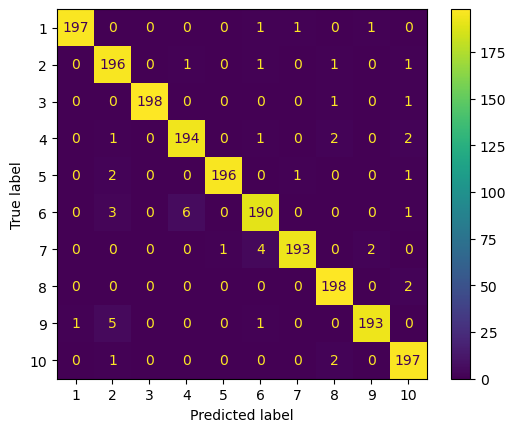

In [385]:
#impressão das performance metrics do clf1
print(f'Mean accuracy ds1 clf1: {mean_accuracy_ds1_clf1:.4f} (std: {std_accuracy_ds1_clf1:.4f})')
print(f'Mean precision ds1 clf1: {mean_precision_ds1_clf1:.4f} (std: {std_precision_ds1_clf1:.4f})')
print(f'Mean recall ds1 clf1: {mean_recall_ds1_clf1:.4f} (std: {std_recall_ds1_clf1:.4f})')
print(f'Mean F1 score ds1 clf1: {mean_f1_ds1_clf1:.4f} (std: {std_f1_ds1_clf1:.4f})')
print()
print("Aggregated confusion matrix ds1 clf1:")
disp_cm_ds1_clf1.plot()

Mean accuracy ds1 clf2: 0.9600 (std: 0.0145)
Mean precision ds1 clf2: 0.9631 (std: 0.0125)
Mean recall ds1 clf2: 0.9600 (std: 0.0145)
Mean F1 score: ds1 clf2 0.9599 (std: 0.0144)

Aggregated confusion matrix ds1 clf2:


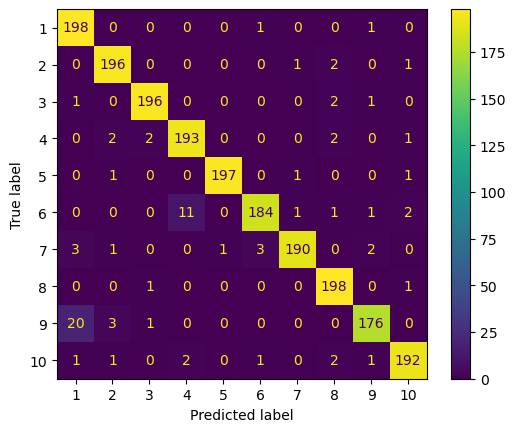

In [386]:
#impressão das performance metrics do clf2
print(f'Mean accuracy ds1 clf2: {mean_accuracy_ds1_clf2:.4f} (std: {std_accuracy_ds1_clf2:.4f})')
print(f'Mean precision ds1 clf2: {mean_precision_ds1_clf2:.4f} (std: {std_precision_ds1_clf2:.4f})')
print(f'Mean recall ds1 clf2: {mean_recall_ds1_clf2:.4f} (std: {std_recall_ds1_clf2:.4f})')
print(f'Mean F1 score: ds1 clf2 {mean_f1_ds1_clf2:.4f} (std: {std_f1_ds1_clf2:.4f})')
print()
print("Aggregated confusion matrix ds1 clf2:")
disp_cm_ds1_clf2.plot()

# 

## 4.2 ds2

Mean accuracy ds2 clf1: 0.6618 (std: 0.0607)
Mean precision ds2 clf1: 0.6600 (std: 0.0671)
Mean recall ds2 clf1: 0.6618 (std: 0.0607)
Mean F1 score ds2 clf1: 0.6536 (std: 0.0618)

Aggregated confusion matrix ds2 clf1:


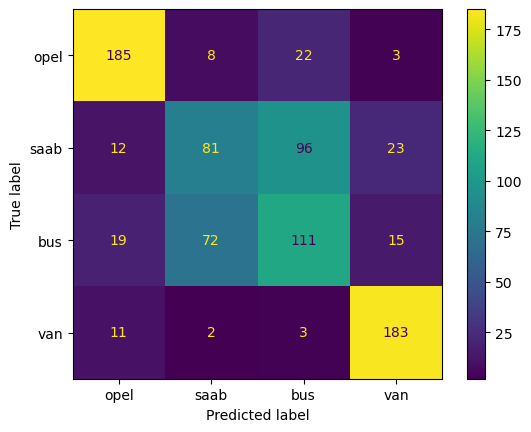

In [387]:
#impressão das performance metrics do clf1
print(f'Mean accuracy ds2 clf1: {mean_accuracy_ds2_clf1:.4f} (std: {std_accuracy_ds2_clf1:.4f})')
print(f'Mean precision ds2 clf1: {mean_precision_ds2_clf1:.4f} (std: {std_precision_ds2_clf1:.4f})')
print(f'Mean recall ds2 clf1: {mean_recall_ds2_clf1:.4f} (std: {std_recall_ds2_clf1:.4f})')
print(f'Mean F1 score ds2 clf1: {mean_f1_ds2_clf1:.4f} (std: {std_f1_ds2_clf1:.4f})')
print()
print("Aggregated confusion matrix ds2 clf1:")
disp_cm_ds2_clf1.plot()

Mean accuracy ds2 clf2: 0.7280 (std: 0.0548)
Mean precision ds2 clf2: 0.7249 (std: 0.0602)
Mean recall ds2 clf2: 0.7280 (std: 0.0548)
Mean F1 score: ds2 clf2 0.7218 (std: 0.0560)

Aggregated confusion matrix ds2 clf2:


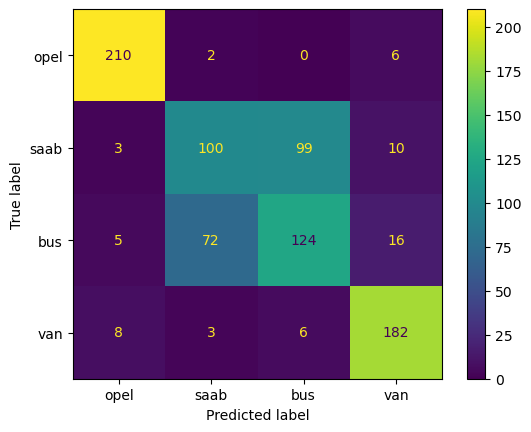

In [388]:
#impressão das performance metrics do clf2
print(f'Mean accuracy ds2 clf2: {mean_accuracy_ds2_clf2:.4f} (std: {std_accuracy_ds2_clf2:.4f})')
print(f'Mean precision ds2 clf2: {mean_precision_ds2_clf2:.4f} (std: {std_precision_ds2_clf2:.4f})')
print(f'Mean recall ds2 clf2: {mean_recall_ds2_clf2:.4f} (std: {std_recall_ds2_clf2:.4f})')
print(f'Mean F1 score: ds2 clf2 {mean_f1_ds2_clf2:.4f} (std: {std_f1_ds2_clf2:.4f})')
print()
print("Aggregated confusion matrix ds2 clf2:")
disp_cm_ds2_clf2.plot()

# 

## 4.3 ds3

Mean accuracy ds3 clf1: 0.8132 (std: 0.0224)
Mean precision ds3 clf1: 0.7951 (std: 0.0253)
Mean recall ds3 clf1: 0.8132 (std: 0.0224)
Mean F1 score ds3 clf1: 0.8023 (std: 0.0239)

Aggregated confusion matrix ds3 clf1:


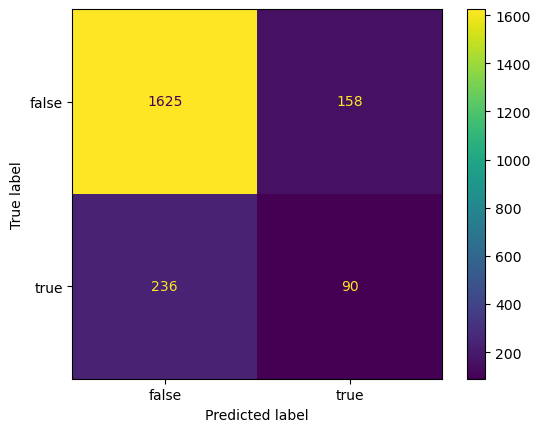

In [389]:
#impressão das performance metrics do clf1
print(f'Mean accuracy ds3 clf1: {mean_accuracy_ds3_clf1:.4f} (std: {std_accuracy_ds3_clf1:.4f})')
print(f'Mean precision ds3 clf1: {mean_precision_ds3_clf1:.4f} (std: {std_precision_ds3_clf1:.4f})')
print(f'Mean recall ds3 clf1: {mean_recall_ds3_clf1:.4f} (std: {std_recall_ds3_clf1:.4f})')
print(f'Mean F1 score ds3 clf1: {mean_f1_ds3_clf1:.4f} (std: {std_f1_ds3_clf1:.4f})')
print()
print("Aggregated confusion matrix ds3 clf1:")
disp_cm_ds3_clf1.plot()

Mean accuracy ds3 clf2: 0.8203 (std: 0.0235)
Mean precision ds3 clf2: 0.8001 (std: 0.0274)
Mean recall ds3 clf2: 0.8203 (std: 0.0235)
Mean F1 score: ds3 clf2 0.8069 (std: 0.0262)

Aggregated confusion matrix ds3 clf2:


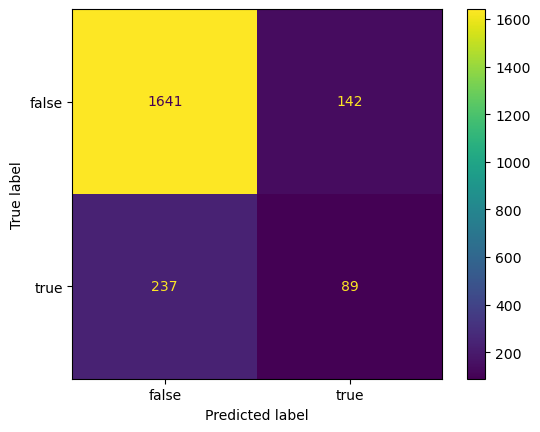

In [390]:
#impressão das performance metrics do clf2
print(f'Mean accuracy ds3 clf2: {mean_accuracy_ds3_clf2:.4f} (std: {std_accuracy_ds3_clf2:.4f})')
print(f'Mean precision ds3 clf2: {mean_precision_ds3_clf2:.4f} (std: {std_precision_ds3_clf2:.4f})')
print(f'Mean recall ds3 clf2: {mean_recall_ds3_clf2:.4f} (std: {std_recall_ds3_clf2:.4f})')
print(f'Mean F1 score: ds3 clf2 {mean_f1_ds3_clf2:.4f} (std: {std_f1_ds3_clf2:.4f})')
print()
print("Aggregated confusion matrix ds3 clf2:")
disp_cm_ds3_clf2.plot()

# 

## 4.4 ds4

Mean accuracy ds4 clf1: 0.7621 (std: 0.0307)
Mean precision ds4 clf1: 0.7339 (std: 0.0377)
Mean recall ds4 clf1: 0.7621 (std: 0.0307)
Mean F1 score ds4 clf1: 0.7367 (std: 0.0349)

Aggregated confusion matrix ds4 clf1:


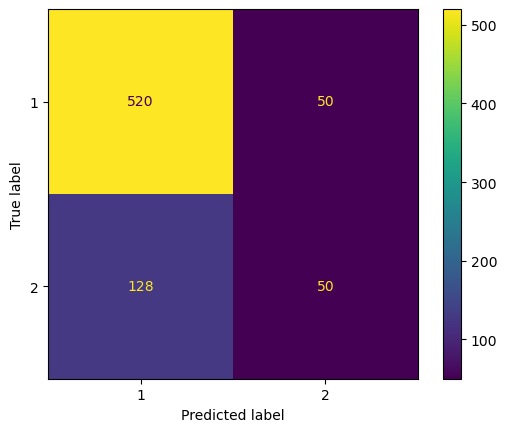

In [391]:
#impressão das performance metrics do clf1
print(f'Mean accuracy ds4 clf1: {mean_accuracy_ds4_clf1:.4f} (std: {std_accuracy_ds4_clf1:.4f})')
print(f'Mean precision ds4 clf1: {mean_precision_ds4_clf1:.4f} (std: {std_precision_ds4_clf1:.4f})')
print(f'Mean recall ds4 clf1: {mean_recall_ds4_clf1:.4f} (std: {std_recall_ds4_clf1:.4f})')
print(f'Mean F1 score ds4 clf1: {mean_f1_ds4_clf1:.4f} (std: {std_f1_ds4_clf1:.4f})')
print()
print("Aggregated confusion matrix ds4 clf1:")
disp_cm_ds4_clf1.plot()

Mean accuracy ds4 clf2: 0.7714 (std: 0.0321)
Mean precision ds4 clf2: 0.7550 (std: 0.0383)
Mean recall ds4 clf2: 0.7714 (std: 0.0321)
Mean F1 score: ds4 clf2 0.7558 (std: 0.0359)

Aggregated confusion matrix ds4 clf2:


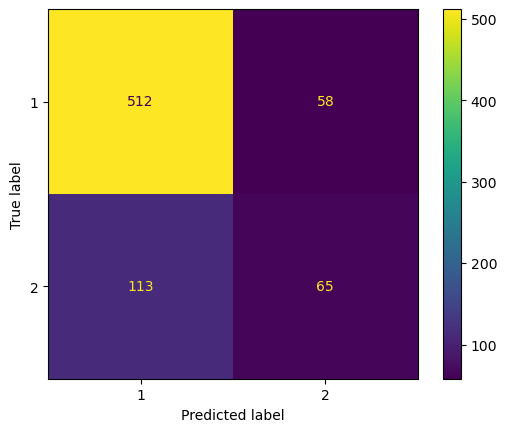

In [392]:
#impressão das performance metrics do clf2
print(f'Mean accuracy ds4 clf2: {mean_accuracy_ds4_clf2:.4f} (std: {std_accuracy_ds4_clf2:.4f})')
print(f'Mean precision ds4 clf2: {mean_precision_ds4_clf2:.4f} (std: {std_precision_ds4_clf2:.4f})')
print(f'Mean recall ds4 clf2: {mean_recall_ds4_clf2:.4f} (std: {std_recall_ds4_clf2:.4f})')
print(f'Mean F1 score: ds4 clf2 {mean_f1_ds4_clf2:.4f} (std: {std_f1_ds4_clf2:.4f})')
print()
print("Aggregated confusion matrix ds4 clf2:")
disp_cm_ds4_clf2.plot()

# 

## 4.4 ds5

Mean accuracy ds5 clf1: 0.4565 (std: 0.0342)
Mean precision ds5 clf1: 0.4221 (std: 0.0422)
Mean recall ds5 clf1: 0.4565 (std: 0.0342)
Mean F1 score ds5 clf1: 0.4343 (std: 0.0385)

Aggregated confusion matrix ds5 clf1:


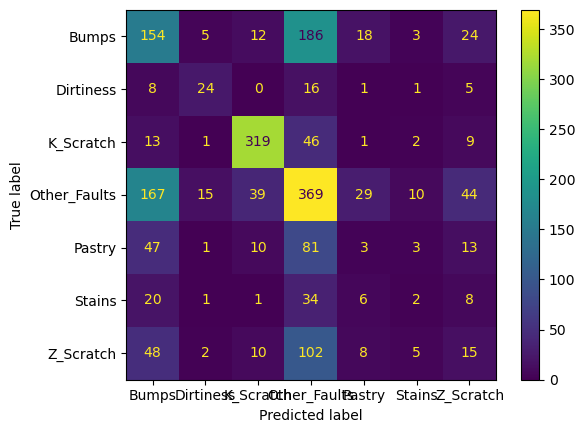

In [393]:
#impressão das performance metrics do clf1
print(f'Mean accuracy ds5 clf1: {mean_accuracy_ds5_clf1:.4f} (std: {std_accuracy_ds5_clf1:.4f})')
print(f'Mean precision ds5 clf1: {mean_precision_ds5_clf1:.4f} (std: {std_precision_ds5_clf1:.4f})')
print(f'Mean recall ds5 clf1: {mean_recall_ds5_clf1:.4f} (std: {std_recall_ds5_clf1:.4f})')
print(f'Mean F1 score ds5 clf1: {mean_f1_ds5_clf1:.4f} (std: {std_f1_ds5_clf1:.4f})')
print()
print("Aggregated confusion matrix ds5 clf1:")
disp_cm_ds5_clf1.plot()

Mean accuracy ds5 clf2: 0.7388 (std: 0.0244)
Mean precision ds5 clf2: 0.7428 (std: 0.0239)
Mean recall ds5 clf2: 0.7388 (std: 0.0244)
Mean F1 score: ds5 clf2 0.7369 (std: 0.0242)

Aggregated confusion matrix ds5 clf2:


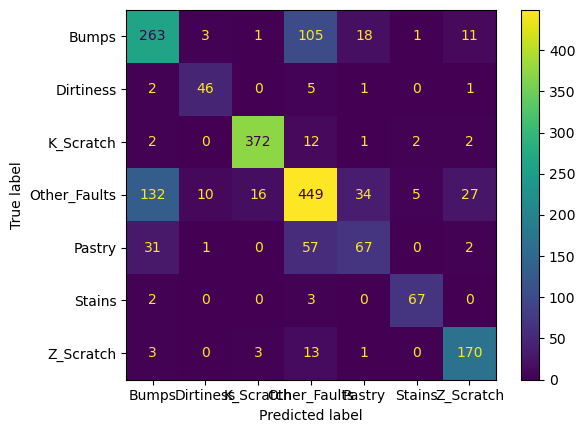

In [394]:
#impressão das performance metrics do clf2
print(f'Mean accuracy ds5 clf2: {mean_accuracy_ds5_clf2:.4f} (std: {std_accuracy_ds5_clf2:.4f})')
print(f'Mean precision ds5 clf2: {mean_precision_ds5_clf2:.4f} (std: {std_precision_ds5_clf2:.4f})')
print(f'Mean recall ds5 clf2: {mean_recall_ds5_clf2:.4f} (std: {std_recall_ds5_clf2:.4f})')
print(f'Mean F1 score: ds5 clf2 {mean_f1_ds5_clf2:.4f} (std: {std_f1_ds5_clf2:.4f})')
print()
print("Aggregated confusion matrix ds5 clf2:")
disp_cm_ds5_clf2.plot()

# 
# 
# 

# 5 Conclusões

In [395]:
print("Comparação dos Modelos em ds1:")
resultados_ds1

Comparação dos Modelos em ds1:


,Accuracy,Precision,Recall,F1 Score
Modelo Original,0.976,0.977205,0.976,0.975994
Modelo Modificado,0.960,0.963137,0.960,0.959948


In [396]:
print("Comparação dos Modelos em ds2:")
resultados_ds2

Comparação dos Modelos em ds2:


,Accuracy,Precision,Recall,F1 Score
Modelo Original,0.661765,0.660027,0.661765,0.653601
Modelo Modificado,0.728039,0.724941,0.728039,0.721780


In [397]:
print("Comparação dos Modelos em ds3:")
resultados_ds3

Comparação dos Modelos em ds3:


,Accuracy,Precision,Recall,F1 Score
Modelo Original,0.813187,0.795109,0.813187,0.802316
Modelo Modificado,0.820293,0.800086,0.820293,0.806886


In [398]:
print("Comparação dos Modelos em ds4:")
resultados_ds4

Comparação dos Modelos em ds4:


,Accuracy,Precision,Recall,F1 Score
Modelo Original,0.762054,0.733872,0.762054,0.736720
Modelo Modificado,0.771423,0.754973,0.771423,0.755781


In [399]:
print("Comparação dos Modelos em ds5:")
resultados_ds5

Comparação dos Modelos em ds5:


,Accuracy,Precision,Recall,F1 Score
Modelo Original,0.456487,0.422129,0.456487,0.434279
Modelo Modificado,0.738805,0.742832,0.738805,0.736945


# 
# 
# 

# 6 NOTAS

In [400]:
#PONTOS A FOCAR NO PDF (SEGUIR GUIA DO PROFESSOR!!)
#
#ALGORITMO ESCOLHIDO (knn)
#EXPLICAR FUNCIONAMENTO DO ALGORITMO
#PROBLEMAS DO ALGORITMO (CURSE OF DIMENSIONALITY, NOISE/OUTLIERS, ...)
#PROBLEMA ESCOLHIDO PARA RESOLVER (NOISE/OUTLIERS), E DESCREVER O PROBLREMA
#CODIGO ORIGINAL (knn.py)
#MUDANCAS PROPOSTAS
#MUDANCAS IMPLEMENTADAS NO CODIGO (knn_modificado.py)
#MOSTRAR E EXPLICAR DATASETS ESCOLHIDOS
#PERFORMANCE DOS DOIS CODIGOS NOS DATASETS
#COMPARACAO DOS RESULTADOS
#CONCLUSAO




#IMPORTANTE
#
#ds1 diminui um pouco a accuracy (talvez estivesse overfitted)
#ds2, ds3 e ds4 aumentam apenas um pouco a accuracy (caso geral)
#ds5 aumenta DRASTICAMENTE a accuracy (talvez sofresse muito com outliers/noise)

In [401]:
#MUDANCAS MAIS SIGNIFICANTES PARA A RESOLUCAO DOS OUTLIERS SAO:
#*DETEÇÃO DE OUTLIERS!
#*WEIGHTING!

"""
MUDANÇAS IMPLEMENTADAS!!!


Validação dos parametros de input:
- no metodo __init__ (apenas admite valores corretos de k, distance_func e outlier_threshold);

   
Empates em resultados:
- no método _predict_x (escolhe a label mais proxima);
   

Deteção de outliers:
- adicionado método _identify_outliers (identifica outliers de acordo com o threshold)
- método fit integrado neste ficheiro


Normalização:
- na função fit (usando StandardScaler)


Weighting:
- no método aggregate (atribuindo mais peso a instâncias mais próximas, e menos peso a instâncias mais distantes)
"""

'\nMUDANÇAS IMPLEMENTADAS!!!\n\n\nValidação dos parametros de input:\n- no metodo __init__ (apenas admite valores corretos de k, distance_func e outlier_threshold);\n\n   \nEmpates em resultados:\n- no método _predict_x (escolhe a label mais proxima);\n   \n\nDeteção de outliers:\n- adicionado método _identify_outliers (identifica outliers de acordo com o threshold)\n- método fit integrado neste ficheiro\n\n\nNormalização:\n- na função fit (usando StandardScaler)\n\n\nWeighting:\n- no método aggregate (atribuindo mais peso a instâncias mais próximas, e menos peso a instâncias mais distantes)\n'

In [402]:
#comparacao de accuracy com aumento do k

"""
k_values = list(range(1, 51))
accuracies_varia_k_clf2 = []

for k in k_values:
    fold_accuracies_varia_k_clf2 = []
    for train_index, test_index in kf.split(X1):
        X1_train, X1_test = X1.iloc[train_index], X1.iloc[test_index]
        y1_train, y1_test = y1.iloc[train_index], y1.iloc[test_index]
        
        clf2 = knn_modificado.KNNClassifier(k=k, distance_func=distance.euclidean, outlier_threshold=8)
        clf2.fit(X1_train, y1_train)
        
        y1_pred_k_clf2 = clf2.predict(X1_test)
        fold_accuracies_varia_k_clf2.append(accuracy_score(y1_test, y1_pred_k_clf2))

    mean_accuracy_k_clf2 = np.mean(fold_accuracies_clf2)
    accuracies_varia_k_clf2.append(mean_accuracy_k_clf2)
"""

"""
plt.plot(k_values, accuracies_varia_k_clf2, marker='o')
plt.title('Accuracy clf2 vs. k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
"""

"\nplt.plot(k_values, accuracies_varia_k_clf2, marker='o')\nplt.title('Accuracy clf2 vs. k')\nplt.xlabel('k')\nplt.ylabel('Accuracy')\nplt.grid(True)\nplt.show()\n"